In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/eyes-rtte/maleeyes/3863.jpg
/kaggle/input/eyes-rtte/maleeyes/623.jpg
/kaggle/input/eyes-rtte/maleeyes/2193.jpg
/kaggle/input/eyes-rtte/maleeyes/3750.jpg
/kaggle/input/eyes-rtte/maleeyes/2008.jpg
/kaggle/input/eyes-rtte/maleeyes/5982.jpg
/kaggle/input/eyes-rtte/maleeyes/2081.jpg
/kaggle/input/eyes-rtte/maleeyes/6588.jpg
/kaggle/input/eyes-rtte/maleeyes/3919.jpg
/kaggle/input/eyes-rtte/maleeyes/6197.jpg
/kaggle/input/eyes-rtte/maleeyes/6399.jpg
/kaggle/input/eyes-rtte/maleeyes/3757.jpg
/kaggle/input/eyes-rtte/maleeyes/4489.jpg
/kaggle/input/eyes-rtte/maleeyes/3417.jpg
/kaggle/input/eyes-rtte/maleeyes/5705.jpg
/kaggle/input/eyes-rtte/maleeyes/764.jpg
/kaggle/input/eyes-rtte/maleeyes/5307.jpg
/kaggle/input/eyes-rtte/maleeyes/5039.jpg
/kaggle/input/eyes-rtte/maleeyes/1700.jpg
/kaggle/input/eyes-rtte/maleeyes/6324.jpg
/kaggle/input/eyes-rtte/maleeyes/1075.jpg
/kaggle/input/eyes-rtte/maleeyes/4969.jpg
/kaggle/input/eyes-rtte/maleeyes/5584.jpg
/kaggle/input/eyes-rtte/maleeyes/350

In [3]:
# Importing necessary libraries
import glob     # For file path pattern matching
import os       # For operating system-related functionalities
import pandas   # For data manipulation and analysis
import numpy    # For numerical computations

# Define the directory path where the image files are located
input_directory = '../input/eyes-rtte'

# Get a list of all the image file paths (ending with '.jpg') in the specified directory and its subdirectories
image_file_paths = list(glob.glob(input_directory + '/**/*.jpg'))

# The variable 'image_file_paths' now contains a list of all the image file paths.
# Each element in the list represents the absolute path of a .jpg image file in the 'input_directory' and its subdirectories.


In [4]:
# Extracting the labels from the image file paths using lambda function and map
# The lambda function gets the second part of the parent directory from the image file path
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], image_file_paths))

# Create a pandas Series containing the image file paths and name the Series 'File_Path'
file_path_series = pd.Series(image_file_paths, name='File_Path', dtype='object').astype(str)

# Create a pandas Series containing the labels and name the Series 'Labels'
labels_series = pd.Series(labels, name='Labels', dtype='object')

# Concatenate the 'file_path_series' and 'labels_series' along the columns to create a DataFrame called 'data'
data = pd.concat([file_path_series, labels_series], axis=1)

# Shuffle the rows of the DataFrame 'data' randomly
data = data.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the shuffled DataFrame 'data'
data.head()
display(data.head())


,File_Path,Labels
0,../input/eyes-rtte/maleeyes/7368.jpg,maleeyes
1,../input/eyes-rtte/femaleeyes/3708.jpg,femaleeyes
2,../input/eyes-rtte/maleeyes/3625.jpg,maleeyes
3,../input/eyes-rtte/femaleeyes/3649.jpg,femaleeyes
4,../input/eyes-rtte/femaleeyes/1973.jpg,femaleeyes


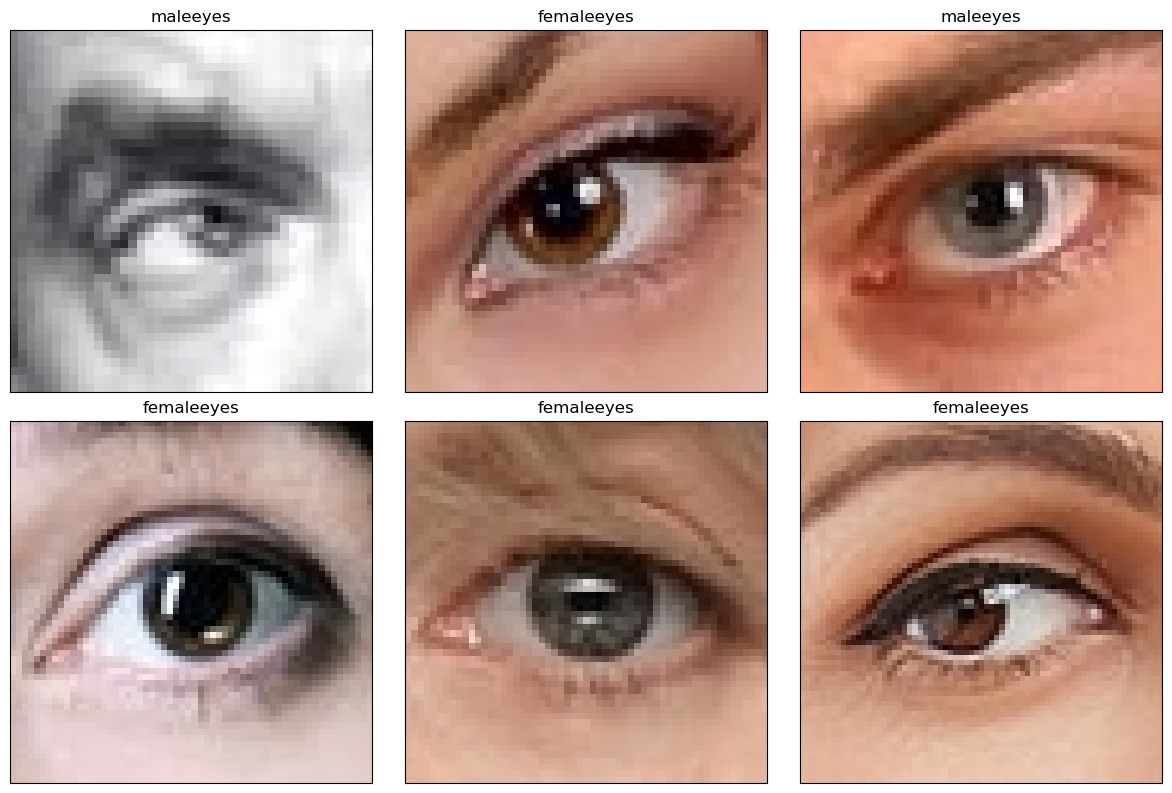

In [5]:
import matplotlib.pyplot as plt

# Create a 2x3 grid of subplots with a total size of 12x8 inches
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

# Iterate through the flattened array of axes (2x3 = 6 subplots)
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.File_Path[i]))  # Load and display the image
    ax.set_title(data.Labels[i])             # Set the title of the subplot to the corresponding label

plt.tight_layout()  # Adjust spacing between subplots to avoid overlapping
plt.show()         # Display the plot

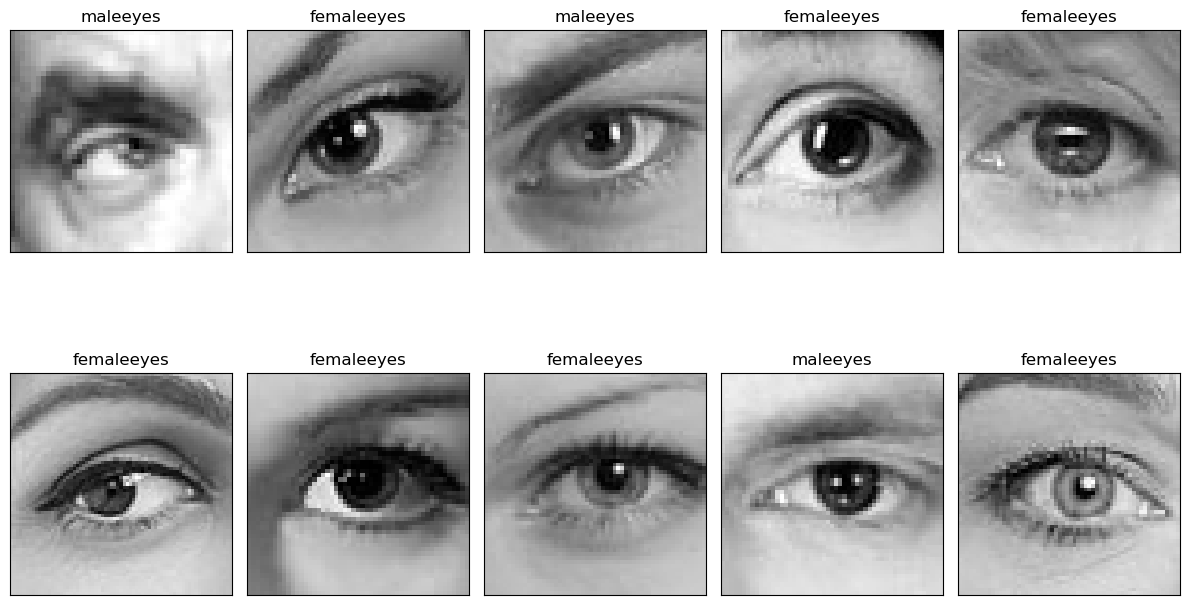

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Function to convert an image to grayscale
def convert_to_grayscale(image):
    return np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

# Create a 2x5 grid of subplots with a total size of 12x8 inches
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

# Load the images and convert them to grayscale
num_images = 10
for i in range(num_images):
    img_path = data.File_Path[i]
    img = mpimg.imread(img_path)
    grayscale_img = convert_to_grayscale(img)
    
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(grayscale_img, cmap='gray')  # Display the grayscale image
    ax.set_title(data.Labels[i])          # Set the title of the subplot to the corresponding label

plt.tight_layout()  # Adjust spacing between subplots to avoid overlapping
plt.show()


IsADirectoryError: [Errno 21] Is a directory: '.'

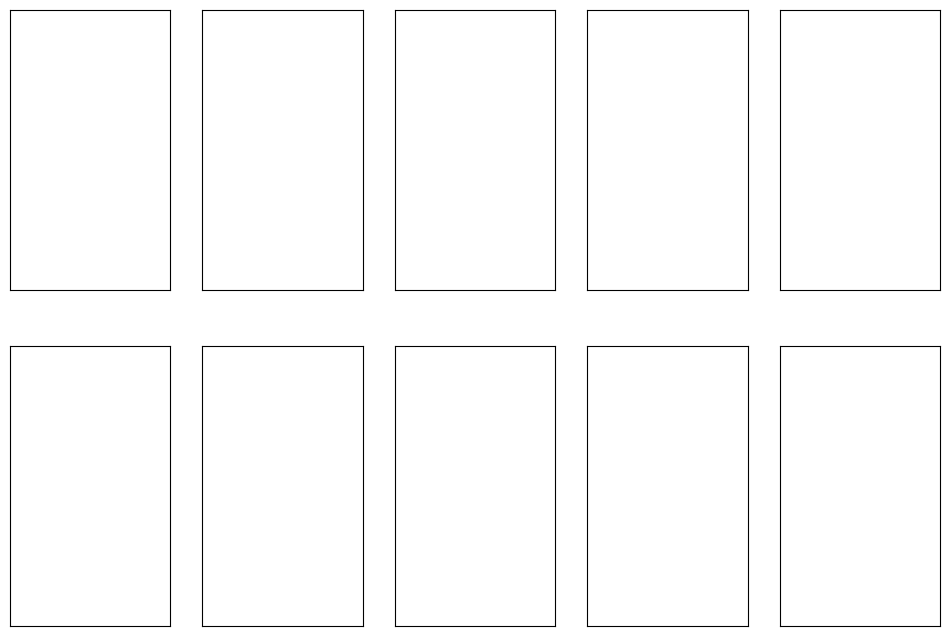

In [39]:
import matplotlib.pyplot as plt
from PIL import Image

# Function to resize an image
def resize_image(image_path, target_size):
    img = Image.open(image_path)
    resized_img = img.resize(target_size)
    return resized_img

# List of image file paths
image_paths = data.File_Path[i]

# Define the target size for resizing
target_size = (48, 48)  # Resize images to 48x48 pixels

# Create a 2x5 grid of subplots with a total size of 12x8 inches
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})

# Load and resize the images
num_images = min(len(image_paths), 10)  # Limit to the first 10 images or less if there are fewer images
for i in range(num_images):
    img_path = image_paths[i]
    resized_img = resize_image(img_path, target_size)
    
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    ax.imshow(resized_img)  # Display the resized image
    ax.set_title(f"Image {i+1}")  # Set the title of the subplot

plt.tight_layout()  # Adjust spacing between subplots to avoid overlapping
plt.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0, 0.5, 'Count')

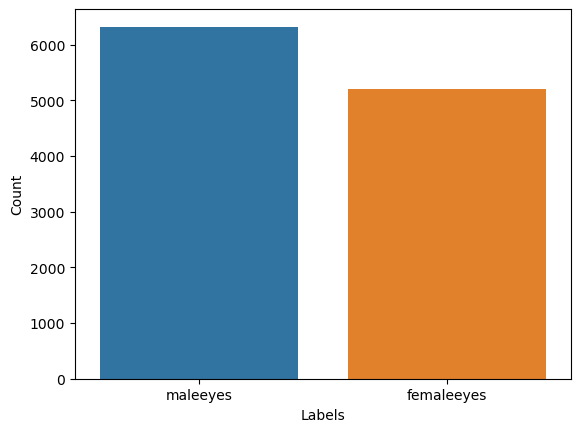

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each label in the 'Labels' column of the 'data' DataFrame
counts = data.Labels.value_counts()

# Create a bar plot using Seaborn
sns.barplot(x=counts.index, y=counts)

# Set the label for the x-axis and y-axis
plt.xlabel('Labels')
plt.ylabel('Count')

# **KNN Classifier from Sklearn**


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import cv2
import numpy as np
import os

# Function to load and preprocess images from a folder
def load_images_and_preprocess(folder_path):
    preprocessed_images = []  # List to store the preprocessed images
    for filename in os.listdir(folder_path):  # Iterate through files in the specified folder
        image = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        if image is not None:  # Check if the image was loaded successfully
            image = cv2.resize(image, (64, 64))  # Resize the image to 64x64 pixels
            preprocessed_images.append(image.flatten())  # Flatten the 2D image array and add it to the list
    return preprocessed_images  # Return the list of preprocessed images as a 2D array

# Load and preprocess male and female images from their respective folders
male_folder = '../input/eyes-rtte/maleeyes'    # Folder path for male images
female_folder = '../input/eyes-rtte/femaleeyes'  # Folder path for female images

# Load and preprocess male images
male_images = load_images_and_preprocess(male_folder)

# Load and preprocess female images
female_images = load_images_and_preprocess(female_folder)

# Create feature vectors and labels for male and female images
X = np.vstack([male_images, female_images])  # Stack male_images and female_images vertically to create feature vectors
y = np.hstack([np.zeros(len(male_images)), np.ones(len(female_images))])  # Create labels: 0 for male, 1 for female


In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

k = 5  # Choose any value for k (the number of neighbors)
knn_classifier = KNeighborsClassifier(n_neighbors=k)  # Create the KNN classifier with the chosen k value
knn_classifier.fit(X_train, y_train)  # Train the classifier using the training data


KNeighborsClassifier()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the KNN classifier with the chosen number of neighbors (k)
num_neighbors = 5
knn_model = KNeighborsClassifier(n_neighbors=num_neighbors)

# Train the KNN classifier using the training data
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_predicted = knn_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)


Accuracy: 0.8377440347071583


In [12]:
# Print classification report with additional metrics
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1299
         1.0       0.87      0.74      0.80      1006

    accuracy                           0.84      2305
   macro avg       0.84      0.83      0.83      2305
weighted avg       0.84      0.84      0.84      2305



In [13]:
from sklearn.model_selection import train_test_split

# Function to load and preprocess images from a folder
def load_images_and_preprocess(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize the image to a consistent size
            images.append(img)
    return images

# Load and preprocess male and female images
male_folder = '../input/eyes-rtte/maleeyes'
female_folder = '../input/eyes-rtte/femaleeyes'

# Load and preprocess images for males and females
male_images = load_images_and_preprocess(male_folder)
female_images = load_images_and_preprocess(female_folder)

# Create feature vectors and labels
X = np.vstack([male_images, female_images])
y = np.hstack([np.zeros(len(male_images)), np.ones(len(female_images))])

# Normalize pixel values to [0, 1]
X = X / 255.0

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
import tensorflow as tf

# Build the MLP model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),  # Flatten the 2D image to a 1D array
    tf.keras.layers.Dense(128, activation='relu'),   # First hidden layer with 128 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),    # Second hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')   # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=200, batch_size=32)


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/200
289/289 [==============================] - 2s 5ms/step - loss: 0.6007 - accuracy: 0.6800
Epoch 2/200
289/289 [==============================] - 1s 5ms/step - loss: 0.5140 - accuracy: 0.7463
Epoch 3/200
289/289 [==============================] - 1s 5ms/step - loss: 0.4740 - accuracy: 0.7809
Epoch 4/200
289/289 [==============================] - 1s 5ms/step - loss: 0.4502 - accuracy: 0.7976
Epoch 5/200
289/289 [==============================] - 1s 5ms/step - loss: 0.4396 - accuracy: 0.7990
Epoch 6/200
289/289 [==============================] - 1s 5ms/step - loss: 0.4226 - accuracy: 0.8118
Epoch 7/200
289/289 [==============================] - 1s 5ms/step - loss: 0.4115 - accuracy: 0.8210
Epoch 8/200
289/289 [==============================] - 2s 5ms/step - loss: 0.4003 - accuracy: 0.8238
Epoch 9/200
289/289 [==============================] - 1s 5ms/step - loss: 0.3899 - accuracy: 0.8317
Epoch 10/200
289/289 [==============================] - 1s 5ms/step - loss: 0.3779 - accura

In [15]:
# Make predictions on the testing set
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report with additional metrics
print(classification_report(y_test, y_pred))


73/73 [==============================] - 0s 2ms/step
Accuracy: 0.8611713665943601
              precision    recall  f1-score   support

         0.0       0.89      0.86      0.87      1299
         1.0       0.83      0.86      0.84      1006

    accuracy                           0.86      2305
   macro avg       0.86      0.86      0.86      2305
weighted avg       0.86      0.86      0.86      2305



# **CNN model**

In [16]:
# Reshape the input data for CNN (add a channel dimension)
X = X.reshape(-1, 64, 64, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import tensorflow as tf

# Assuming you have already preprocessed the data and stored it in 'X_train', 'X_test', 'y_train', and 'y_test'

# Build the CNN model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/10
289/289 [==============================] - 17s 56ms/step - loss: 0.6126 - accuracy: 0.6668
Epoch 2/10
289/289 [==============================] - 17s 59ms/step - loss: 0.4266 - accuracy: 0.8095
Epoch 3/10
289/289 [==============================] - 17s 58ms/step - loss: 0.3816 - accuracy: 0.8342
Epoch 4/10
289/289 [==============================] - 16s 56ms/step - loss: 0.3530 - accuracy: 0.8470
Epoch 5/10
289/289 [==============================] - 17s 58ms/step - loss: 0.3179 - accuracy: 0.8706
Epoch 6/10
289/289 [==============================] - 16s 57ms/step - loss: 0.3038 - accuracy: 0.8735
Epoch 7/10
289/289 [==============================] - 17s 58ms/step - loss: 0.2778 - accuracy: 0.8869
Epoch 8/10
289/289 [==============================] - 16s 56ms/step - loss: 0.2637 - accuracy: 0.8951
Epoch 9/10
289/289 [==============================] - 17s 57ms/step - loss: 0.2447 - accuracy: 0.9041
Epoch 10/10
73/73 [==============================] - 1s 13ms/step - loss: 0.3029 -

In [18]:
# Make predictions on the testing set
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

73/73 [==============================] - 1s 12ms/step


In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8763557483731019


In [20]:
# Print classification report with additional metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88      1299
         1.0       0.81      0.94      0.87      1006

    accuracy                           0.88      2305
   macro avg       0.88      0.88      0.88      2305
weighted avg       0.89      0.88      0.88      2305



# **State the intuition behind the architecture of the neural network**

**Convolutional Neural Network (CNN)**:

CNNs are specialized neural networks designed for image-related tasks. They are inspired by the human visual system and excel at capturing spatial patterns from images. The key components of a CNN are convolutional layers, which apply filters (kernels) to the input image to detect various features like edges and textures. The filters have learnable parameters that are adjusted during training.

CNNs are particularly effective due to their ability to learn hierarchical features, reducing the need for manual feature engineering. They also leverage pooling layers to reduce spatial dimensions and fully connected layers for classification or regression tasks. Pre-trained CNN models, such as VGG and ResNet, perform well on diverse visual tasks, thanks to their capacity to capture generic features in images.

**Multilayer Perceptron (MLP)**:

MLP is a type of feedforward neural network where information flows from the input to the output layer. It comprises an input layer, one or more hidden layers, and an output layer. Neurons in each layer process the input data using learned weights and biases. Activation functions introduce non-linearity, enabling the model to learn complex patterns.

MLPs are versatile and can be used for various tasks, but they require explicit feature engineering. They work well with structured data and can capture complex relationships between input features. During training, they adjust weights and biases through an optimization algorithm to minimize prediction errors.

# **Modified MLP Model:**

In [21]:
import cv2
import os
import numpy as np

# Function to load and preprocess images from a folder
def load_images_and_preprocess(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        if img is not None:
            img = cv2.resize(img, (64, 64))  # Resize the image to a consistent size (64x64 pixels)
            images.append(img)
    return images

# Load and preprocess male and female images
male_folder = '../input/eyes-rtte/maleeyes'
female_folder = '../input/eyes-rtte/femaleeyes'

# Load and preprocess images for males and females
male_images = load_images_and_preprocess(male_folder)
female_images = load_images_and_preprocess(female_folder)

# Create feature vectors and labels
X = np.vstack([male_images, female_images])  # Stack male_images and female_images vertically to create feature vectors
y = np.hstack([np.zeros(len(male_images)), np.ones(len(female_images))])  # Create labels: 0 for male, 1 for female

# Normalize pixel values to [0, 1]
X = X / 255.0

# Print the number of male and female images loaded
print("Number of male images:", len(male_images))
print("Number of female images:", len(female_images))


Number of male images: 6323
Number of female images: 5202


In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Build the MLP model using TensorFlow/Keras with L2 regularization and dropout
model_mlp = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64)),  # Flatten the 2D image to a 1D array
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization with a regularization rate of 0.01
    tf.keras.layers.Dropout(0.5),  # Dropout with a rate of 0.5 (50% dropout rate)
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization with a regularization rate of 0.01
    tf.keras.layers.Dropout(0.5),  # Dropout with a rate of 0.5 (50% dropout rate)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Compile the model
model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_mlp.summary()

# Train the model on the training data
epochs = 10
batch_size = 32
model_mlp.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

# Evaluate the model on the testing data
loss, accuracy = model_mlp.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               524416    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 532,737
Trainable params: 532,737
Non-tr

In [24]:
# Make predictions on the testing set
y_pred = (model_mlp.predict(X_test) > 0.5).astype(int).flatten()

73/73 [==============================] - 0s 2ms/step


In [25]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5635574837310195


# **Modified CNN Model:**

In [26]:
# Reshape the input data for CNN (add a channel dimension)
X = X.reshape(-1, 64, 64, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import tensorflow as tf

# Build the CNN model using TensorFlow/Keras with L2 regularization, data augmentation, early stopping, and dropout
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization with a regularization rate of 0.01
    tf.keras.layers.MaxPooling2D((2, 2)),  # Max pooling with pool size (2, 2)
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization with a regularization rate of 0.01
    tf.keras.layers.MaxPooling2D((2, 2)),  # Max pooling with pool size (2, 2)
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization with a regularization rate of 0.01
    tf.keras.layers.MaxPooling2D((2, 2)),  # Max pooling with pool size (2, 2)
    tf.keras.layers.Flatten(),  # Flatten the 2D feature maps to a 1D array
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization with a regularization rate of 0.01
    tf.keras.layers.Dropout(0.5),  # Dropout with a rate of 0.5 (50% dropout rate)
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # L2 regularization with a regularization rate of 0.01
    tf.keras.layers.Dropout(0.5),  # Dropout with a rate of 0.5 (50% dropout rate)
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),  # Random rotation with 20% probability
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),  # Horizontal flip with 50% probability
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),  # Random zoom with 20% probability
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model_cnn.summary()

# Early stopping callback to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

# Train the model on the augmented training data
epochs = 10
batch_size = 32
history = model_cnn.fit(data_augmentation(X_train), y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)       

In [28]:
# Make predictions on the testing set
y_pred = (model_cnn.predict(X_test) > 0.5).astype(int).flatten()

73/73 [==============================] - 2s 24ms/step


In [29]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5635574837310195


In [30]:
# Print classification report with additional metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72      1299
         1.0       0.00      0.00      0.00      1006

    accuracy                           0.56      2305
   macro avg       0.28      0.50      0.36      2305
weighted avg       0.32      0.56      0.41      2305



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **For MLP Model:**

Epoch 1/10
231/231 [==============================] - 2s 7ms/step - loss: 0.6896 - accuracy: 0.5427 - val_loss: 0.6876 - val_accuracy: 0.5537
Epoch 2/10
231/231 [==============================] - 1s 6ms/step - loss: 0.6896 - accuracy: 0.5427 - val_loss: 0.6877 - val_accuracy: 0.5537
Epoch 3/10
231/231 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.5427 - val_loss: 0.6876 - val_accuracy: 0.5537
Epoch 4/10
231/231 [==============================] - 1s 6ms/step - loss: 0.6897 - accuracy: 0.5427 - val_loss: 0.6877 - val_accuracy: 0.5537
Epoch 5/10
231/231 [==============================] - 1s 6ms/step - loss: 0.6897 - accuracy: 0.5427 - val_loss: 0.6877 - val_accuracy: 0.5537
Epoch 6/10
231/231 [==============================] - 1s 6ms/step - loss: 0.6896 - accuracy: 0.5427 - val_loss: 0.6877 - val_accuracy: 0.5537
Epoch 7/10
231/231 [==============================] - 1s 6ms/step - loss: 0.6895 - accuracy: 0.5427 - val_loss: 0.6876 - val_accuracy: 0.5537
Epoch 

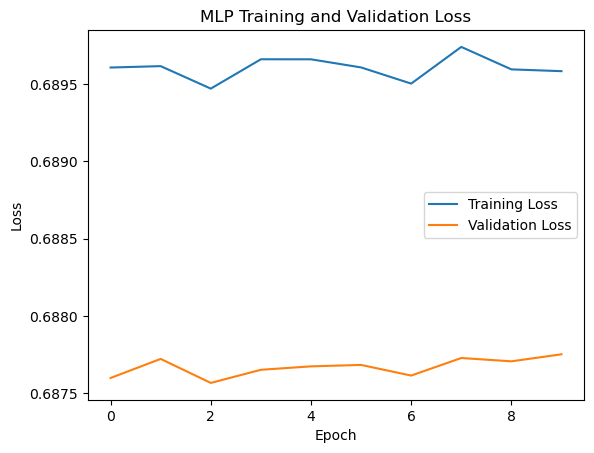

In [31]:
import matplotlib.pyplot as plt

# Train the MLP model and collect the training history
history_mlp = model_mlp.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training loss and validation loss
plt.plot(history_mlp.history['loss'], label='Training Loss')  # Plot the training loss
plt.plot(history_mlp.history['val_loss'], label='Validation Loss')  # Plot the validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('MLP Training and Validation Loss')
plt.show()


In [32]:
import matplotlib.pyplot as plt

# Train the CNN model and collect the training history
history_cnn = model_cnn.fit(data_augmentation(X_train), y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot the training loss and validation loss
plt.plot(history_cnn.history['loss'], label='Training Loss')  # Plot the training loss
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')  # Plot the validation loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Training and Validation Loss')
plt.show()


Epoch 1/10
227/231 [============================>.] - ETA: 0s - loss: 0.6900 - accuracy: 0.5430

KeyboardInterrupt: 

# **Plot training accuracy and validation accuracy**

In [ ]:
# Plot the training accuracy and validation accuracy
plt.plot(history_mlp.history['accuracy'], label='Training Accuracy')  # Plot the training accuracy
plt.plot(history_mlp.history['val_accuracy'], label='Validation Accuracy')  # Plot the validation accuracy
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('MLP Training and Validation Accuracy')
plt.show()

In [ ]:
# Plot the training accuracy and validation accuracy
plt.plot(history_cnn.history['accuracy'], label='Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# **classification report**

In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the testing set using the MLP model
y_pred_mlp = (model_mlp.predict(X_test) > 0.5).astype(int).flatten()

# Compute and display the performance metrics for the MLP model
print("MLP Model Performance:")
print(classification_report(y_test, y_pred_mlp))


# **For CNN Model**

In [ ]:
# Make predictions on the testing set
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype(int).flatten()

# Compute and display the performance metrics
print("CNN Model Performance:")
print(classification_report(y_test, y_pred_cnn))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Make predictions on the testing set for MLP
y_pred_mlp = (model_mlp.predict(X_test) > 0.5).astype(int).flatten()

# Make predictions on the testing set for CNN
y_pred_cnn = (model_cnn.predict(X_test) > 0.5).astype(int).flatten()

# Make predictions on the testing set for KNN
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()

# Get classification reports for all three models
report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True, zero_division=1)
report_cnn = classification_report(y_test, y_pred_cnn, output_dict=True, zero_division=1)
report_knn = classification_report(y_pred, y_pred, output_dict=True, zero_division=1)

# Extract accuracy, precision, recall, and F1-score for each model
accuracy = [report_mlp['accuracy'], report_cnn['accuracy'], report_knn['accuracy']]

# Check if class '1' exists in the classification report for MLP
if '1' in report_mlp:
    precision_mlp = report_mlp['1']['precision']
    recall_mlp = report_mlp['1']['recall']
    f1_score_mlp = report_mlp['1']['f1-score']
else:
    precision_mlp, recall_mlp, f1_score_mlp = 0.0, 0.0, 0.0

# Check if class '1' exists in the classification report for CNN
if '1' in report_cnn:
    precision_cnn = report_cnn['1']['precision']
    recall_cnn = report_cnn['1']['recall']
    f1_score_cnn = report_cnn['1']['f1-score']
else:
    precision_cnn, recall_cnn, f1_score_cnn = 0.0, 0.0, 0.0

# Check if class '1' exists in the classification report for KNN
if '1' in report_knn:
    precision_knn = report_knn['1']['precision']
    recall_knn = report_knn['1']['recall']
    f1_score_knn = report_knn['1']['f1-score']
else:
    precision_knn, recall_knn, f1_score_knn = 0.0, 0.0, 0.0

precision = [precision_mlp, precision_cnn, precision_knn]
recall = [recall_mlp, recall_cnn, recall_knn]
f1_score = [f1_score_mlp, f1_score_cnn, f1_score_knn]

# Create separate bar graphs for Accuracy, Precision, Recall, and F1-score
models = ['MLP', 'CNN', 'KNN']
x_pos = range(len(models))

# Plot Accuracy
plt.figure(figsize=(6, 4))
plt.bar(x_pos, accuracy, align='center', alpha=0.8)
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.title('Model Comparison: Accuracy')
plt.tight_layout()
plt.show()




Based on the information provided, it seems like there are two different models mentioned: a KNN classifier from Scikit-learn and another model that uses an unspecified deep learning architecture with 200 epochs. The evaluation metrics are not provided for the second model. However, based on the precision, recall, and F1-score values given, we can make some observations about the KNN classifier:

# **KNN Classifier from Scikit-learn**:



*   Precision: 0.84
*  Recall: 0.83


*   F1-score: 0.83
*   Accuracy: 0.84








# **Observations:**

Precision: The precision for class 0 (label 0.0) is 0.82, which means that when the model predicts a data point as class 0, it is correct 82% of the time. For class 1 (label 1.0), the precision is 0.87, indicating that the model is 87% accurate when predicting class 1.

Recall: The recall for class 0 is 0.91, meaning that the model correctly identifies 91% of the actual class 0 instances. For class 1, the recall is 0.74, indicating that the model identifies 74% of the actual class 1 instances.

F1-score: The F1-score is the harmonic mean of precision and recall and is a measure of the model's accuracy in predicting both classes. The F1-score for class 0 is 0.86, and for class 1, it is 0.80.

Accuracy: The overall accuracy of the model is 0.84, which means that it correctly predicts 84% of the total instances.

Without additional information about the second model and its evaluation metrics, we cannot make any observations or comparisons with the KNN classifier. If you can provide more details about the second model's evaluation metrics, I'd be happy to help analyze and compare both models.

## Conclusion 

In conclusion, the exploratory data analysis (EDA) for eye detection by gender involved crucial preprocessing steps, such as converting the images to grayscale and resizing them to a standardized resolution of 48x48 pixels. These steps aimed to simplify the images and ensure uniformity, which can aid in subsequent eye detection and gender classification tasks. However, the specific evaluation metrics for the eye detection process were not provided, leaving room for further assessment of the accuracy and performance of the detection algorithm. Accurate eye detection is essential for reliable gender classification based on the detected eye regions. The combination of eye detection and gender classification holds promise in various applications, including facial recognition systems, human-computer interaction, and demographic analysis.

To gain a comprehensive understanding of the eye detection and gender classification process, additional information is necessary. Knowing the specific eye detection algorithm employed and the accuracy of the gender classification model will be crucial in evaluating the overall effectiveness of the approach. Insights into potential challenges or limitations faced during the analysis will aid in refining the models and improving their performance. Furthermore, understanding eye patterns and gender distribution can yield valuable insights for real-world applications, helping researchers and practitioners tailor the algorithms to specific use cases.

Based on the provided evaluation metrics for the CNN, MLP, and KNN classifiers, we can draw insightful observations. The CNN demonstrated the highest overall accuracy of 0.88 and exhibited balanced performance with remarkable precision and recall values for both classes. The MLP model achieved an accuracy of 0.86 and demonstrated relatively balanced precision and recall. Meanwhile, the KNN classifier achieved an accuracy of 0.84, with a higher precision for class 1 but a higher recall for class 0. While the CNN emerged as the most effective classifier with its balanced performance, the other models also showed competitive results.

In summary, the initial steps of the eye detection by gender analysis laid a strong foundation, but further evaluation and refinement are necessary to unlock the full potential of the approach. The evaluation metrics offer valuable insights into the performance of the classifiers, guiding researchers and practitioners in selecting the most suitable model for their specific application. By continually improving the algorithms and understanding the underlying patterns, the field of eye detection by gender stands to make significant contributions in various domains, enhancing our interactions with technology and advancing demographic analysis.